In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities import *

In [52]:
"""
==================================================================================================================
Importing CO2 data from the https://global-warming.org/ API
Url is: https://global-warming.org/api/co2-api
==================================================================================================================
"""

'\n==================================================================================================================\nImporting CO2 data from the https://global-warming.org/ API\nUrl is: https://global-warming.org/api/co2-api\n==================================================================================================================\n'

In [53]:
data = Utility().fetch_data_from_api("https://global-warming.org/api/co2-api")
unformatted_co2_df = pd.DataFrame.from_dict(data, orient="columns")

In [54]:
"""
Currently the imported data exists in the dataframe in the following format:

                                                    co2
0     {'year': '2011', 'month': '1', 'day': '1', 'cy...
1     {'year': '2011', 'month': '1', 'day': '2', 'cy...
2     {'year': '2011', 'month': '1', 'day': '3', 'cy...
3     {'year': '2011', 'month': '1', 'day': '4', 'cy...
4     {'year': '2011', 'month': '1', 'day': '5', 'cy...

This is not optimal, I want to reshape the data so that the keys of each dictionary/json
object are dataframe columns corresponding to their associated values. 
==================================================================================================================
"""

"\nCurrently the imported data exists in the dataframe in the following format:\n\n                                                    co2\n0     {'year': '2011', 'month': '1', 'day': '1', 'cy...\n1     {'year': '2011', 'month': '1', 'day': '2', 'cy...\n2     {'year': '2011', 'month': '1', 'day': '3', 'cy...\n3     {'year': '2011', 'month': '1', 'day': '4', 'cy...\n4     {'year': '2011', 'month': '1', 'day': '5', 'cy...\n\nThis is not optimal, I want to reshape the data so that the keys of each dictionary/json\nobject are dataframe columns corresponding to their associated values. \n==================================================================================================================\n"

In [55]:
# reshape the data
co2_df = pd.DataFrame(unformatted_co2_df["co2"].values.tolist())
co2_df["year"] = co2_df["year"].astype(float).astype(int)

In [56]:
# Now you can see the dataframe is more suited for manipulation
"""
      year month day   cycle   trend
0     2011     1   1  391.25  389.75
1     2011     1   2  391.29  389.76
2     2011     1   3  391.32  389.77
3     2011     1   4  391.36  389.77
4     2011     1   5  391.39  389.78
...    ...   ...  ..     ...     ...
3743  2021     4   1  416.28  414.44
3744  2021     4   2  416.29  414.45
3745  2021     4   3  416.30  414.46
3746  2021     4   4  416.32  414.46
3747  2021     4   5  416.33  414.47
"""

'\n      year month day   cycle   trend\n0     2011     1   1  391.25  389.75\n1     2011     1   2  391.29  389.76\n2     2011     1   3  391.32  389.77\n3     2011     1   4  391.36  389.77\n4     2011     1   5  391.39  389.78\n...    ...   ...  ..     ...     ...\n3743  2021     4   1  416.28  414.44\n3744  2021     4   2  416.29  414.45\n3745  2021     4   3  416.30  414.46\n3746  2021     4   4  416.32  414.46\n3747  2021     4   5  416.33  414.47\n'

In [57]:
# get the shape of the dataframe:
# print(df.shape)
"""
Output: 
(3752, 5)
3752 rows and 5 columns
"""

# Check the dataframe for any null or duplicate values:

# rows with missing data
rows_null_data = co2_df[co2_df.isnull()]
# print(rows_null_data)

In [58]:
"""
Get the sum of all null values in a specific row (replace with any column from dataframe).
Instead of manually assigning each column name and checking individually, I created a reuseable utility function 'check_rows_null_values()'.
The function will use a for loop to iterate over a list of column names contained in the dataframe, 
and return a count for the number of null values in each columns corresponding rows. 
"""

"\nGet the sum of all null values in a specific row (replace with any column from dataframe).\nInstead of manually assigning each column name and checking individually, I created a reuseable utility function 'check_rows_null_values()'.\nThe function will use a for loop to iterate over a list of column names contained in the dataframe, \nand return a count for the number of null values in each columns corresponding rows. \n"

In [59]:
util = Utility(co2_df)  # init utility class with dataframe
columns_list = util.check_rows_null_values(  # call check_rows_null_values()
    co2_df.columns
)

In [60]:
# (optional) for ease of use, convert the list of dict again to a dataframe to get a report of the findings:
null_row_value_report = pd.DataFrame(columns_list)
# print(null_row_value_report.to_string(index=False))

In [61]:
"""
==================================================================================================================
Importing Temperature data from the https://global-warming.org/ API
Url is: https://global-warming.org/api/temperature-api
==================================================================================================================
"""

'\n==================================================================================================================\nImporting Temperature data from the https://global-warming.org/ API\nUrl is: https://global-warming.org/api/temperature-api\n==================================================================================================================\n'

In [62]:
data = Utility().fetch_data_from_api(
    "https://global-warming.org/api/temperature-api"
)
unformatted_temp_df = pd.DataFrame.from_dict(data, orient="columns")

In [63]:
# reshape the data
temp_df = pd.DataFrame(unformatted_temp_df["result"].values.tolist())

In [64]:
# the temperature data has a data range from years 1880 - 2021, but I am only interested in from 2011 onwards, similar to the co2 data.
# convert all values in the time column to type int.
temp_df["time"] = temp_df["time"].astype(float).astype(int)

In [65]:
# to see how many values exist for each year in the dataframe:
months_per_year = Utility(temp_df).get_row_value_counts("time")

In [66]:
# greater than the start date and smaller than the end date
time_filter = (temp_df["time"] >= 2011) & (temp_df["time"] <= 2021)

In [67]:
# the final (usable) temperature dataframe after formatting:
temp_df = temp_df.loc[time_filter]
temp_df.rename(columns={"time": "year"}, inplace=True)

In [68]:
"""
Merge both the co2 dataframe and the temperature dataframes:
"""

'\nMerge both the co2 dataframe and the temperature dataframes:\n'

In [69]:
dataframes_merged = pd.merge(co2_df, temp_df)

In [70]:
# remove unsued columns (month & day)
del dataframes_merged["month"]
del dataframes_merged["day"]

In [71]:
# reset the dataframe index
reindexed_final_df = dataframes_merged

In [72]:
# reuse of utility function to see how many unique values exist for each year in the dataframe:
uniq_values_per_year = Utility(reindexed_final_df).get_row_value_counts("year")

In [73]:
"""
Output: 

      cycle  trend  station  land
year                             
2011   4380   4380     4380  4380
2012   4392   4392     4392  4392
2013   4380   4380     4380  4380
2014   4380   4380     4380  4380
2015   4380   4380     4380  4380
2016   4392   4392     4392  4392
2017   4380   4380     4380  4308
2018   4380   4380     4380  4380
2019   4380   4380     4380  4380
2020   4392   4392     4392  4392
2021    200    200      200   200
"""

'\nOutput: \n\n      cycle  trend  station  land\nyear                             \n2011   4380   4380     4380  4380\n2012   4392   4392     4392  4392\n2013   4380   4380     4380  4380\n2014   4380   4380     4380  4380\n2015   4380   4380     4380  4380\n2016   4392   4392     4392  4392\n2017   4380   4380     4380  4308\n2018   4380   4380     4380  4380\n2019   4380   4380     4380  4380\n2020   4392   4392     4392  4392\n2021    200    200      200   200\n'

In [74]:
# get the average C02 trend level for each year.
unique_years = reindexed_final_df["year"].unique()
years_averages_co2 = []

In [75]:
# for every year, get the average values
for year in unique_years:
    averages = reindexed_final_df.loc[reindexed_final_df["year"] == year, "trend"]
    float_list = [float(i) for i in averages.to_list()]
    int_list = [int(i) for i in float_list]
    years_averages_co2.append(list(set(int_list)))

In [76]:
# get the mean c02 values per year
mean_per_year = []
for i in years_averages_co2:
    mean = Utility.Average(i)
    mean_per_year.append(mean)

In [77]:
# perform the same task for the temperature increase
mean_station_averages = []
for year in unique_years:
    station_averages = reindexed_final_df.loc[
        reindexed_final_df["year"] == year, "station"
    ]
    float_list = [float(i) for i in station_averages.to_list()]
    unique_values = list(set(float_list))

    mean = Utility.Average(unique_values)
    mean_temperateure_rounded = round(mean, 2)
    mean_station_averages.append(mean_temperateure_rounded)

In [78]:
"""
==================================================================================================================
Begin correlation between temperature C02 rise and growth in global energy demand
CSV obtained from data.worldbank.org
https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE?end=2015&start=2015&view=bar
==================================================================================================================
"""

'\n==================================================================================================================\nBegin correlation between temperature C02 rise and growth in global energy demand\nCSV obtained from data.worldbank.org\nhttps://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE?end=2015&start=2015&view=bar\n==================================================================================================================\n'

In [79]:
energy_data = pd.read_csv("data/energy.csv")
energy_dataframe = pd.DataFrame(energy_data)

In [80]:
# rename 'entity' column to country
energy_dataframe.rename(columns={"Entity": "Country"}, inplace=True)

In [81]:
# distinct country names:
world_dataframe = energy_dataframe[energy_dataframe["Country"] == "World"]

In [82]:
# filter to only return rows beginning from 2011
energy_filtered_for_time = world_dataframe[world_dataframe["Year"] >= 2011]

In [83]:
# utility checks:
util = Utility(energy_filtered_for_time)  # init utility class with dataframe
columns_list = util.check_rows_null_values(
    energy_filtered_for_time.columns
)  # call check_rows_null_values()

In [84]:
# output:
"""
[{'Name': 'Country', 'Null counts': 0}, 
{'Name': 'Code', 'Null counts': 201}, 
{'Name': 'Year', 'Null counts': 0}, 
{'Name': 'Primary energy consumption (TWh)', 'Null counts': 0}]
"""

"\n[{'Name': 'Country', 'Null counts': 0}, \n{'Name': 'Code', 'Null counts': 201}, \n{'Name': 'Year', 'Null counts': 0}, \n{'Name': 'Primary energy consumption (TWh)', 'Null counts': 0}]\n"

In [85]:
# dropping 'Code' & 'Country' - column, not required
del energy_filtered_for_time["Code"]
del energy_filtered_for_time["Country"]

In [86]:
year = energy_filtered_for_time["Year"]
energy = energy_filtered_for_time["Primary energy consumption (TWh)"]

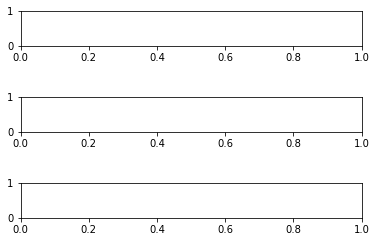

In [87]:
"""
Plot all data here:
"""
fig, axs = plt.subplots(3)
fig.tight_layout(pad=3.0)

In [88]:
# Co2 plot
axs[0].scatter(unique_years, mean_per_year, color="red")
m, b = np.polyfit(unique_years, mean_per_year, 1)  # linear regression line
axs[0].plot(unique_years, m * unique_years + b)
axs[0].set_title("C02 ppm (parts per million) 2011 - 2020")
axs[0].set_ylabel("PPM")
axs[0].set_xlabel("Years")

Text(0.5, 175.20000000000005, 'Years')

In [89]:
# Temperature plot
axs[1].scatter(unique_years, mean_station_averages, color="orange")
m, b = np.polyfit(unique_years, mean_station_averages, 1)  # linear regression line
axs[1].plot(unique_years, m * unique_years + b)
axs[1].set_title("Temperature increase (Celcius) 2011 - 2020")
axs[1].set_ylabel("Degrees Celsius")
axs[1].set_xlabel("Years")

Text(0.5, 89.20000000000002, 'Years')

In [90]:
# Energy plot
axs[2].scatter(year, energy, color="purple")
m, b = np.polyfit(year, energy, 1)  # linear regression line
axs[2].plot(year, m * year + b)
axs[2].set_title("Global Energy demand 2011 - 2019")
axs[2].set_ylabel("Primary energy consumption (TWh)")
axs[2].set_xlabel("Years")
plt.show()

In [91]:
"""
* (Optional) Extra but not part of this course *
"""
# linear regression plot:
# merge all dataframes and export to csv:

# rename 'Year' column to 'year'
energy_filtered_for_time = energy_filtered_for_time.rename(columns={"Year": "year"})

In [92]:
"""
Merge both datasets into one dataframe for use with Tensorflow:
"""

merged = pd.merge(
    reindexed_final_df,
    energy_filtered_for_time,
    left_on="year",
    right_on="year",
    how="left",
)

# uncomment this line for result
# tf = TensorFlowProcessing(merged)